In [44]:
data(iris)
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

In [45]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Corela√ß√£o de Person

In [46]:
cor_test_sepal <- cor.test(iris$Sepal.Length, iris$Sepal.Width)
cor_test_sepal


	Pearson's product-moment correlation

data:  iris$Sepal.Length and iris$Sepal.Width
t = -1.4403, df = 148, p-value = 0.1519
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.27269325  0.04351158
sample estimates:
       cor 
-0.1175698 


O valor de p-value (0.1519) √© maior que 0.05, o que significa que n√£o h√° evid√™ncia suficiente para rejeitar a hip√≥tese nula (H0). A hip√≥tese nula nesse caso afirma que n√£o h√° correla√ß√£o entre Sepal.Length e Sepal.Width.

In [47]:
cor_test_sepal <- cor.test(iris$Petal.Length, iris$Petal.Width)
cor_test_sepal


	Pearson's product-moment correlation

data:  iris$Petal.Length and iris$Petal.Width
t = 43.387, df = 148, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9490525 0.9729853
sample estimates:
      cor 
0.9628654 


H√° uma correla√ß√£o positiva muito forte entre o comprimento e a largura das p√©talas, o que faz sentido do ponto de vista biol√≥gico, j√° que essas dimens√µes provavelmente crescem juntas em muitas esp√©cies de flores, incluindo as do dataset iris.

# 3. An√°lise em Componentes Principais (ACP)

Agora, realizamos uma ACP (An√°lise em Componentes Principais) com as vari√°veis adequadas (normalmente as quantitativas). Vamos eliminar a vari√°vel Species para focar nas vari√°veis num√©ricas.

In [48]:
library(FactoMineR)

In [49]:
iris_data <- iris[, 1:4] # Selecionar as vari√°veis quantitativas
pca_result <- PCA(iris_data, scale.unit = TRUE, graph = FALSE)

summary(pca_result)


Call:
PCA(X = iris_data, scale.unit = TRUE, graph = FALSE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4
Variance               2.918   0.914   0.147   0.021
% of var.             72.962  22.851   3.669   0.518
Cumulative % of var.  72.962  95.813  99.482 100.000

Individuals (the 10 first)
                 Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2    Dim.3
1            |  2.319 | -2.265  1.172  0.954 |  0.480  0.168  0.043 | -0.128
2            |  2.202 | -2.081  0.989  0.893 | -0.674  0.331  0.094 | -0.235
3            |  2.389 | -2.364  1.277  0.979 | -0.342  0.085  0.020 |  0.044
4            |  2.378 | -2.299  1.208  0.935 | -0.597  0.260  0.063 |  0.091
5            |  2.476 | -2.390  1.305  0.932 |  0.647  0.305  0.068 |  0.016
6            |  2.555 | -2.076  0.984  0.660 |  1.489  1.617  0.340 |  0.027
7            |  2.468 | -2.444  1.364  0.981 |  0.048  0.002  0.000 |  0.335
8            |  2.246 | -2.233  1.139  0.988 |  0.223  0.036  0.010 |

In [50]:
pca_result$eig

eigenvalue percentage of variance cumulative percentage of variance
comp 1 2.91849782 72.9624454              72.96245                        
comp 2 0.91403047 22.8507618              95.81321                        
comp 3 0.14675688  3.6689219              99.48213                        
comp 4 0.02071484  0.5178709             100.00000

Examine o resumo das vari√°veis num√©ricas: Use a fun√ß√£o summary em R para ver o alcance (m√≠nimo e m√°ximo) de cada vari√°vel. Se os valores das vari√°veis t√™m ordens de grandeza muito diferentes, a ACP normada √© recomendada.

In [51]:
summary(iris[, 1:4])

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  

Por fim, para uma ACP normada em R, caso os valores sejam bastante diferentes, voc√™ pode definir scale.unit = TRUE:

In [52]:
iris_acp <- PCA(iris[, 1:4], scale.unit = TRUE)

Para decidir quantos eixos manter com base no Crit√©rio de Kaiser, usamos os autovalores. De acordo com esse crit√©rio, voc√™ deve manter apenas os componentes **com autovalores maiores que 1**, pois eles capturam uma quantidade significativa de vari√¢ncia.

In [53]:
iris_acp$eig

eigenvalue percentage of variance cumulative percentage of variance
comp 1 2.91849782 72.9624454              72.96245                        
comp 2 0.91403047 22.8507618              95.81321                        
comp 3 0.14675688  3.6689219              99.48213                        
comp 4 0.02071484  0.5178709             100.00000

Apenas o Componente 1 tem autovalor maior que 1. Portanto, o Crit√©rio de Kaiser sugere manter apenas o primeiro componente.

Vari√°veis que mais contribuem para os eixos 1 e 2:

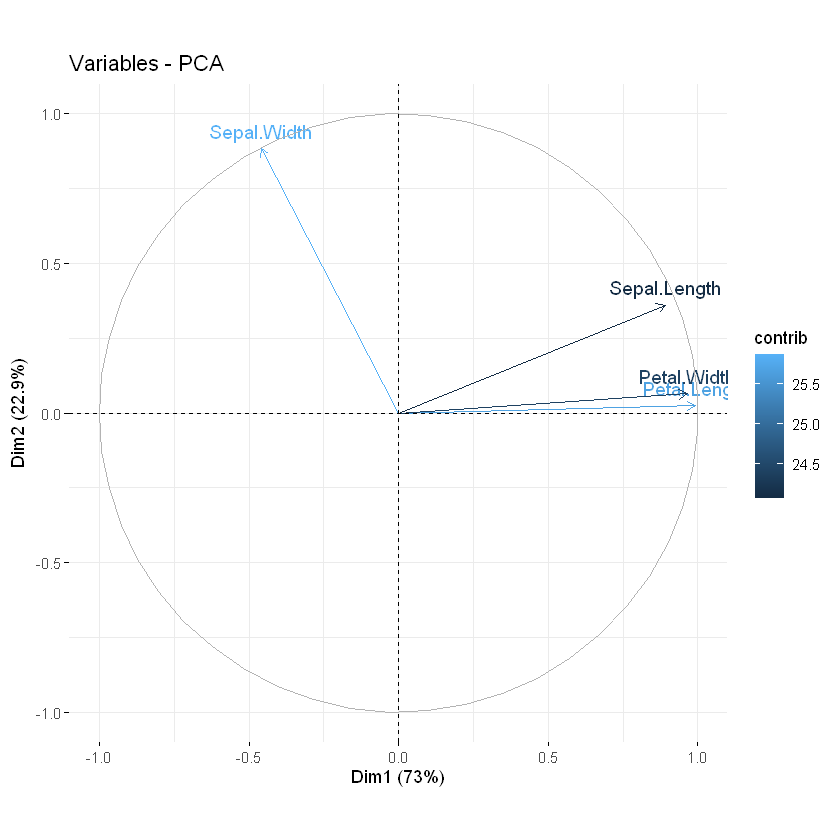

In [54]:
library(factoextra)
fviz_pca_var(iris_acp, col.var = "contrib")

In [55]:
iris_acp$var$contrib

Dim.1     Dim.2       Dim.3     Dim.4    
Sepal.Length 27.150969 14.24440565 51.777574  6.827052
Sepal.Width   7.254804 85.24748749  5.972245  1.525463
Petal.Length 33.687936  0.05998389  2.019990 64.232089
Petal.Width  31.906291  0.44812296 40.230191 27.415396

Vari√°veis bem representadas no plano (1, 2):

In [56]:
# Cos2 das vari√°veis no plano (1, 2)
iris_acp$var$cos2

Dim.1     Dim.2       Dim.3       Dim.4       
Sepal.Length 0.7924004 0.130198208 0.075987149 0.0014142127
Sepal.Width  0.2117313 0.779188012 0.008764681 0.0003159971
Petal.Length 0.9831817 0.000548271 0.002964475 0.0133055723
Petal.Width  0.9311844 0.004095980 0.059040571 0.0056790544

Exemplo de uma iris melhor representada no plano (1,3)

In [57]:
cos2_plane_12 <- iris_acp$ind$cos2[, 1] + iris_acp$ind$cos2[, 2]
cos2_plane_13 <- iris_acp$ind$cos2[, 1] + iris_acp$ind$cos2[, 3]

better_in_13 <- which(cos2_plane_13 > cos2_plane_12)

example <- better_in_13[1]
list(
  Iris_Index = example,
  Cos2_Plane_12 = cos2_plane_12[example],
  Cos2_Plane_13 = cos2_plane_13[example]
)

$Iris_Index
7 
7 

$Cos2_Plane_12
        7 
0.9812967 

$Cos2_Plane_13
        7 
0.9994051

# Part 2
Dist√¢ncia entre Iris 6 e 3:

In [58]:
dist_iris <- dist(iris[, 1:4])
as.matrix(dist_iris)[6, 3]

[1] 1.086278

C√≥digo para achar a classifica√ß√£o a partir da matriz de dist√¢ncias:

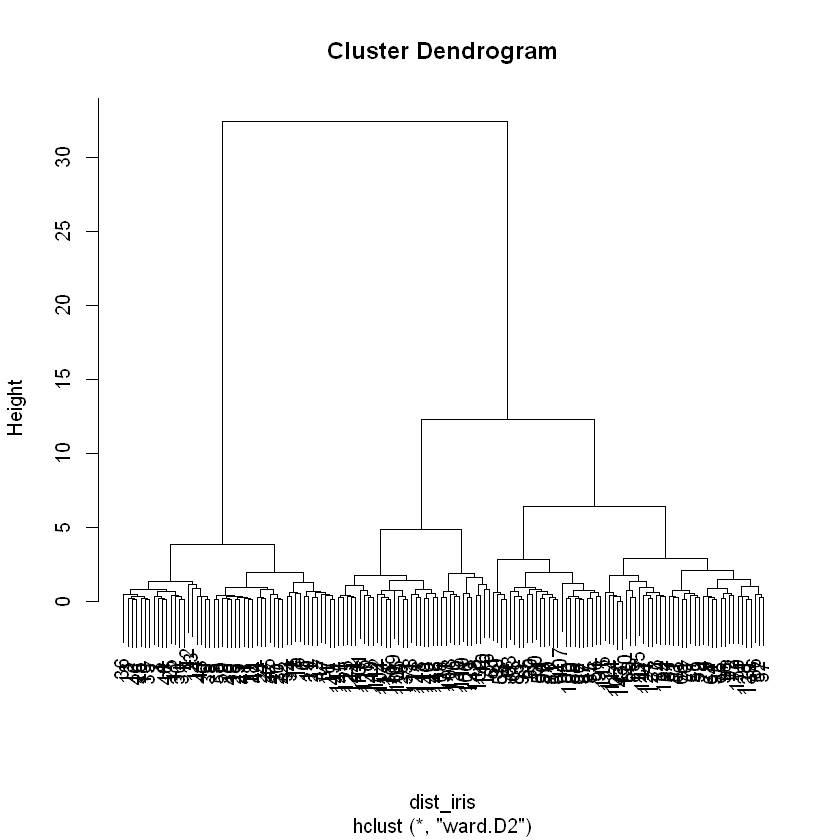

In [59]:
hc_iris <- hclust(dist_iris, method = "ward.D2")
plot(hc_iris)

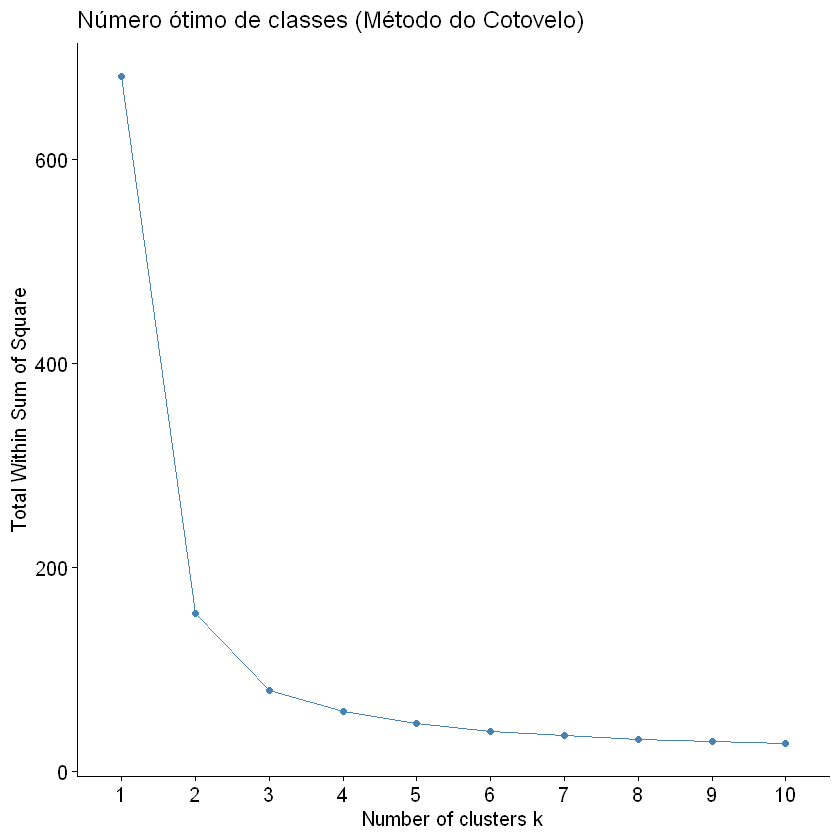

In [60]:
fviz_nbclust(iris[, -5], hcut, method = "wss") + 
  labs(title = "N√∫mero √≥timo de classes (M√©todo do Cotovelo)")

In [61]:
# bom senso

eig <- iris_acp$eig

# Vari√¢ncia acumulada
eig_cumsum <- cumsum(eig[, 2])  # Soma acumulada da vari√¢ncia explicada

# Identificar o n√∫mero m√≠nimo de eixos que capturam pelo menos 70% da vari√¢ncia
num_axes <- which(eig_cumsum >= 70)[1]

# Exibir o resultado
list(
  Variancia_Explicada = eig[, 2],
  Variancia_Acumulada = eig_cumsum,
  Eixos_Selecionados = num_axes
)


$Variancia_Explicada
    comp 1     comp 2     comp 3     comp 4 
72.9624454 22.8507618  3.6689219  0.5178709 

$Variancia_Acumulada
   comp 1    comp 2    comp 3    comp 4 
 72.96245  95.81321  99.48213 100.00000 

$Eixos_Selecionados
comp 1 
     1

A regra do bom-senso n√£o faz sentido aqui, dado que mais de 70% da vari√¢ncia acumulada est√° em somente um eixo. 

## Procure Grandes Saltos nos Ramos: 
Observe onde h√° grandes dist√¢ncias verticais (grandes saltos) entre as jun√ß√µes dos grupos. Estes saltos indicam um n√≠vel importante de separa√ß√£o entre grupos.

> Cada linha horizontal representa uma uni√£o de grupos, e a altura mostra o "custo" ou "dist√¢ncia" para unir esses grupos.
Um grande salto significa que unir mais grupos al√©m daquele ponto traria uma grande perda de similaridade, ent√£o geralmente cortamos o dendrograma antes desse grande salto.


---
Como disse o enunciado, trabalharemos com 3 classes.

In [1]:
classes <- cutree(hc_iris, k = 3) # Dividir os dados em k = 3 classes
table(classes)  # Ver quantas observa√ß√µes est√£o em cada classe

ERROR: Error: objeto 'hc_iris' n√£o encontrado


Identificar todos os indiv√≠duos com base na classe!

In [63]:
print(data.frame(Individuo = rownames(iris), Classe = classes))

    Individuo Classe
1           1      1
2           2      1
3           3      1
4           4      1
5           5      1
6           6      1
7           7      1
8           8      1
9           9      1
10         10      1
11         11      1
12         12      1
13         13      1
14         14      1
15         15      1
16         16      1
17         17      1
18         18      1
19         19      1
20         20      1
21         21      1
22         22      1
23         23      1
24         24      1
25         25      1
26         26      1
27         27      1
28         28      1
29         29      1
30         30      1
31         31      1
32         32      1
33         33      1
34         34      1
35         35      1
36         36      1
37         37      1
38         38      1
39         39      1
40         40      1
41         41      1
42         42      1
43         43      1
44         44      1
45         45      1
46         46      1
47         47

Classe do Iris 70:

In [64]:
classes[70]

[1] 2

M√©dia de Sepal.Length por Classe

In [65]:
aggregate(Sepal.Length ~ classes, data = iris, mean)

classes Sepal.Length
1 1       5.006000    
2 2       5.920312    
3 3       6.869444

An√°lise Discriminante

CAH significa Classifica√ß√£o Ascendente Hier√°rquica (em ingl√™s, Hierarchical Ascendant Classification - HAC), que √© um m√©todo de agrupamento hier√°rquico. Ele organiza os dados em uma hierarquia de grupos ou clusters sem a necessidade de definir um n√∫mero fixo de grupos antes de iniciar o processo.

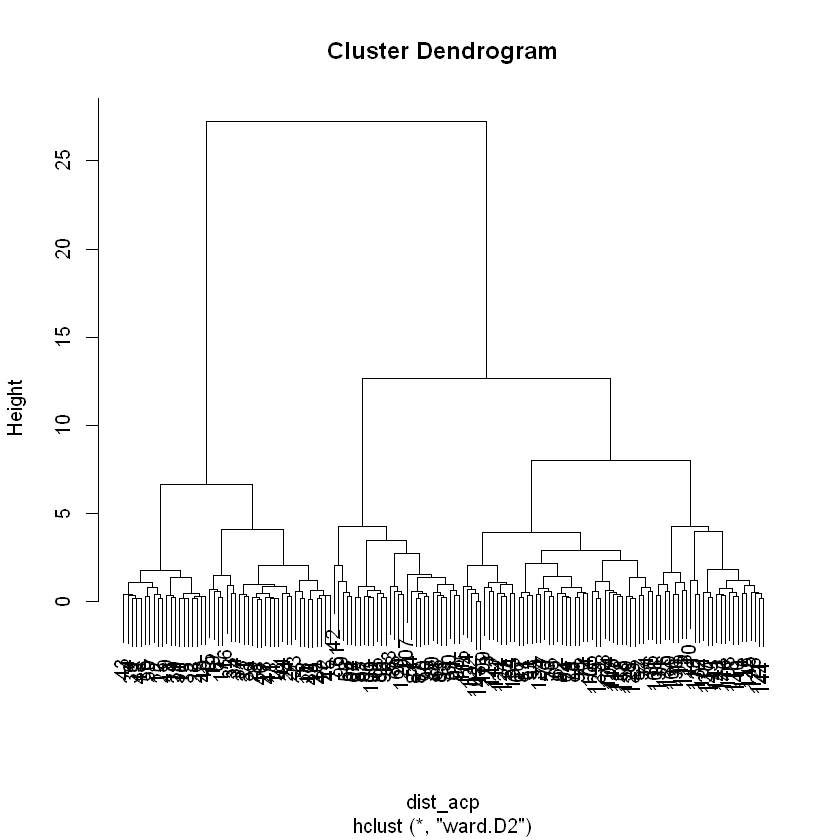

In [66]:
dist_acp <- dist(iris_acp$ind$coord[, 1:4])
hc_acp <- hclust(dist_acp, method = "ward.D2")
plot(hc_acp)

Classifica√ß√£o das Vari√°veis por Discrimin√¢ncia: Utilize uma an√°lise discriminante linear para verificar a import√¢ncia das vari√°veis.

In [67]:
library(MASS)
lda_model <- lda(Species ~ ., data = iris)
lda_model


Call:
lda(Species ~ ., data = iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.8293776 -0.02410215
Sepal.Width   1.5344731 -2.16452123
Petal.Length -2.2012117  0.93192121
Petal.Width  -2.8104603 -2.83918785

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 

#### Conclus√£o

O LD1 captura 99.12% da vari√¢ncia discriminante (o que significa que a maior parte da separa√ß√£o entre as classes est√° nesse eixo), enquanto o LD2 captura apenas 0.88%.

As vari√°veis mais importantes para a separa√ß√£o entre as classes s√£o aquelas com os maiores valores absolutos nos coeficientes de LD1 (j√° que ele captura quase toda a discrimina√ß√£o):

Petal.Width: -2.8104603 (mais discriminante)
Petal.Length: -2.2012117
Sepal.Width: 1.5344731
Sepal.Length: 0.8293776 (menos discriminante)

A ordem de import√¢ncia (da mais discriminante para a menos discriminante) √©:

1. Petal.Width
2. Petal.Length
3. Sepal.Width
4. Sepal.Length

Teste de Wilks:

In [68]:
iris_manova <- manova(cbind(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width) ~ Species, data = iris)
summary(iris_manova, test = "Wilks")

           Df    Wilks approx F num Df den Df    Pr(>F)    
Species     2 0.023439   199.15      8    288 < 2.2e-16 ***
Residuals 147                                              
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [69]:
lda_model$svd^2 / sum(lda_model$svd^2)

[1] 0.991212605 0.008787395

Taxa de Erro do Modelo Discriminante:

In [70]:
predictions <- predict(lda_model)
table(predictions$class, iris$Species)
mean(predictions$class != iris$Species)

            
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         1
  virginica       0          2        49

[1] 0.02

Para realizar uma an√°lise discriminante no conjunto de dados iris, usamos o modelo de an√°lise discriminante linear (LDA). O n√∫mero de eixos discriminantes √© definido por 
min(ùëõ_classes ‚àí 1, ùëõ_vari√°veis), que, no caso do iris, ser√° min(3‚àí1, 4) = 2

In [78]:
# Fazer predi√ß√µes nos dados originais
pred <- predict(lda_model, iris)

confusion_matrix <- table(Predito = pred$class, Real = iris$Species)

# Calcular a taxa de erro
total <- sum(confusion_matrix)  # Total de observa√ß√µes
erros <- total - sum(diag(confusion_matrix))  # Total de erros (fora da diagonal principal)
taxa_erro <- erros / total  # Taxa de erro em porcentagem

cat(taxa_erro* 100, "% de erro.")

2 % de erro.

In [71]:
new_iris <- data.frame(Sepal.Length = 6.3, Sepal.Width = 3, Petal.Length = 5.2, Petal.Width = 1.8)
predict(lda_model, newdata = new_iris)

$class
[1] virginica
Levels: setosa versicolor virginica

$posterior
        setosa versicolor virginica
1 1.289824e-32 0.02988645 0.9701136

$x
        LD1        LD2
1 -4.571524 -0.2484825